<a href="https://colab.research.google.com/github/kornsinanju/Fundamentals-of-Machine-Learning/blob/main/Fundamental_of_Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Machine Learning
## Linear Regression and Classification Programming Report
---
18B09790 Tanpipat Kornvik
### 1. Linear Regression
The first step is to import neccesary library and load diabetes dataset from sklearn. 

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
from sklearn.datasets import load_diabetes

In [168]:
import numpy as np

In [169]:
import matplotlib.pyplot as plt

In [170]:
dia_data = load_diabetes();

Next, we extract bmi data which is the data on the second column of the loaded data. In addition, we also extract the output data from the loaded data using target attribute.

In [171]:
input_x = dia_data.data[:,2];

In [172]:
output_y = dia_data.target;

After all the data is prepared, we perform linear regression to extract the parameters(fit the model) by using sklearn.linear_model.

In [173]:
model = LinearRegression()
model.fit(input_x.reshape(-1,1),output_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Once we fit the model, we can input our own inputs and let the model predict the results(predict_y). The result of the prediction can be seen as the figure below.

In [174]:
test_x = np.linspace(min(input_x),max(input_x),100)
predict_y = model.predict(test_x.reshape(-1,1))

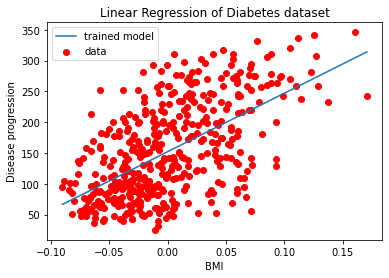

In [175]:
plt.plot(test_x,predict_y);
plt.scatter(input_x,output_y,c='r');
plt.title("Linear Regression of Diabetes dataset")
plt.xlabel("BMI")
plt.ylabel("Disease progression")
plt.legend(["trained model","data"])

### 2. Polynomial Regression
Polynomial Regression uses the basis idea of linear regression. However, we try to fit a non-linear model to the data by considering a degree n polynomial of x.

First, the question asks us to generate random data and calculate its output from pre-defined base function. This can be done as shown in the code below.

In [176]:
def f(x,w0,w1,w2):
  return w0+w1*x**(1/2)+w2*np.sin(2*np.pi*x/5)
rand_x = np.random.random_sample(size=(20))*10
rand_y = f(rand_x,1,2,3);

First, we will have to scale the data to avoid overflow.




In [177]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
scaler = StandardScaler()
scaled_rand_x = scaler.fit_transform(rand_x.reshape(-1,1))

Then, we fit the data the same way we did in the previous question. In this question, we will use iteration for each degree to make the code concise. In addition, we also have to calculate n-degree polynomial of x in each iteration which can be achieved by using PolynomialFeatures of sklearn.preprocessing as shown below. Furthermore, we have to be careful to scale the test data since we also scale the input data when we train the model.

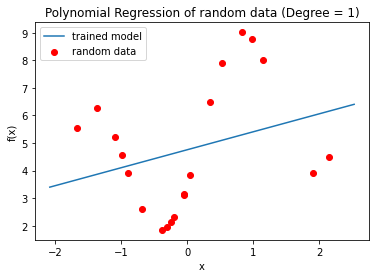

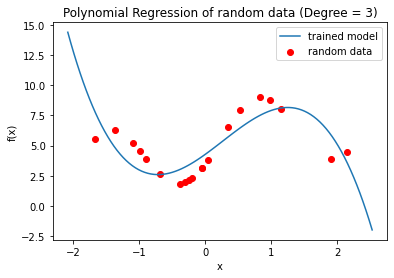

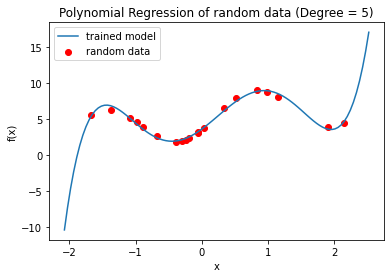

In [178]:
degs = [1,3,5]
for i,deg in enumerate(degs):
  transformed_x = PolynomialFeatures(degree=deg).fit_transform(scaled_rand_x.reshape(-1,1))
  # perform linear fitting
  model2 = LinearRegression()
  model2.fit(transformed_x,rand_y)
  # create test data and perform scaling
  test2_x = np.linspace(0,10,100)
  scaled_test2_x = scaler.transform(test2_x.reshape(-1,1))
  predict2_y = model2.predict(PolynomialFeatures(degree=deg).fit_transform(scaled_test2_x.reshape(-1,1)))
  # plot the result
  plt.figure(i)
  plt.plot(scaled_test2_x,predict2_y)
  plt.scatter(scaled_rand_x,rand_y,c="r")
  plt.title("Polynomial Regression of random data (Degree = "+str(deg) + ")")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.legend(["trained model","random data"])

We can also see that the higher the degree, the better the model fit to the random data. However, making the degree value too high can also lead to overfitting. This can be solved using the method in the next question.

---



### 3. Regularization

In this task, we work on the same data as stated in the previous question. However, we introduce regularization technique to overcome overfitting by adding penalty to the loss function in proportional to the square of the norm of the parameter (Ridge) or the norm of the parameter (Lasso).



Here we import related library for L2(Ridge) and L1(Lasso) regularization and proceed the same way, we did in the previous question. However, we also add an additional loop for each degree n to observe the effects of the coefficient. We can easily perform regularization using Ridge and LassoLars class from sklearn.linear_model.

> Indented block



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.06322e-16): result may not be accurate.
  overwrite_a=False)


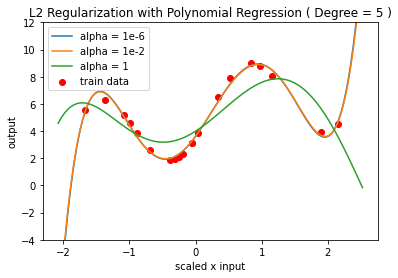

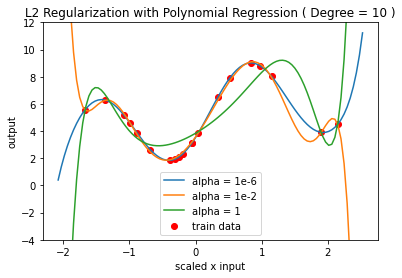

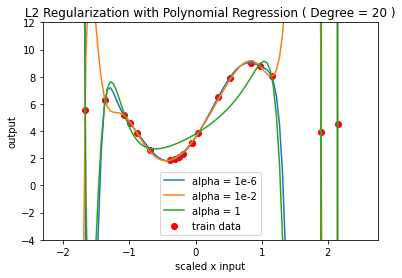

In [179]:
from sklearn.linear_model import LassoLars,Ridge
degs = [5,10,20]
# add additional parameter for investigating different effects of the coefficient
alpha = [1e-6,1e-2,1]
for i,deg in enumerate(degs):
  transformed3_x = PolynomialFeatures(degree=deg).fit_transform(scaled_rand_x.reshape(-1,1))
  plt.figure(i)
  # for each deg, plot result using different coefficient
  for a in alpha:
    # perform fitting with L2 regularization with alpha = a
    model3 = Ridge(alpha=a)
    model3.fit(transformed3_x,rand_y)
    # fit the test data, reusing the test data from the previous question which is create by np.linspace
    predict3_y = model3.predict(PolynomialFeatures(degree=deg).fit_transform(scaled_test2_x.reshape(-1,1)))
    plt.plot(scaled_test2_x,predict3_y)
  plt.scatter(scaled_rand_x,rand_y,c="r")
  plt.legend(["alpha = 1e-6","alpha = 1e-2","alpha = 1","train data"])
  plt.ylim((-4,12))
  plt.xlabel("scaled x input")
  plt.ylabel("output")
  plt.title("L2 Regularization with Polynomial Regression ( Degree = " + str(deg)+" )")

The same process can be easily applied to L1 regularization by substituting Ridge with LassoLars as shown below.

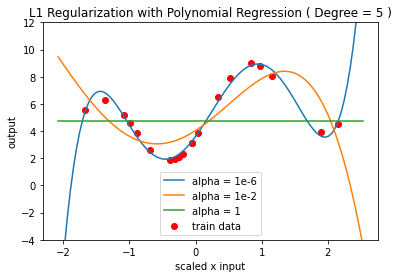

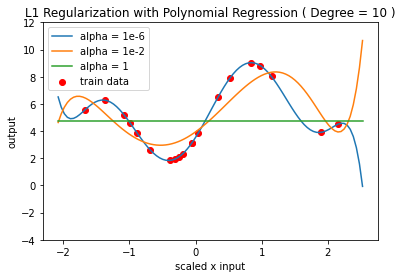

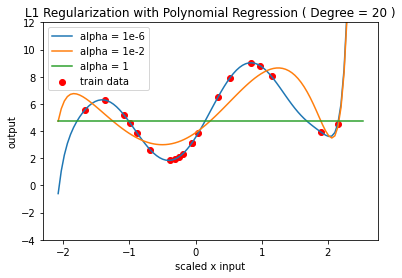

In [180]:
degs = [5,10,20]
alpha = [1e-6,1e-2,1]
for i,deg in enumerate(degs):
  transformed3_x = PolynomialFeatures(degree=deg).fit_transform(scaled_rand_x.reshape(-1,1))
  plt.figure(i)
  # for each deg, plot result using different coefficient
  for a in alpha:
    # perform fitting with L1 regularization with alpha = a
    model3 = LassoLars(alpha=a)
    model3.fit(transformed3_x,rand_y)
    # fit the test data, reusing the test data from the previous question which is create by np.linspace
    predict3_y = model3.predict(PolynomialFeatures(degree=deg).fit_transform(scaled_test2_x.reshape(-1,1)))
    plt.plot(scaled_test2_x,predict3_y)
  plt.scatter(scaled_rand_x,rand_y,c="r")
  plt.legend(["alpha = 1e-6","alpha = 1e-2","alpha = 1","train data"])
  plt.ylim((-4,12))
  plt.xlabel("scaled x input")
  plt.ylabel("output")
  plt.title("L1 Regularization with Polynomial Regression ( Degree = " + str(deg)+" )")

We can clearly observe that the lower the alpha value, the less effect regularization term has on mitigating overfitting. We can also observe that Lasso regression can make the parameter(coefficients) to absolute zero while Ridge regression does not.

### 4. Classification
In this question, we will perform classification technique to separate data into several classes. First, we will load the data and pick 2 columns from the data as shown below.

In [181]:
from sklearn.datasets import load_iris
iris_data = load_iris()
# pick petal length and petal width to perform classification
petal_data = iris_data.data[:,(2,3)]

We also extract the classification result from the loaded data which has 3 classes using the code below.

In [182]:
iris_output = iris_data.target

Then, we split the data into train data and test data using sklearn.model_selection as shown below.

In [183]:
from sklearn.model_selection import train_test_split
train4_x,test4_x,train4_y,test4_y = train_test_split(petal_data,iris_output,train_size=0.9)

#### 4.1. Logistic Regression
In this section, we will use the prepared data from the above code to perform classification using logistic regression. This step can be quickly done using LogisticRegression class from sklearn.linear_model.

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
# fit train data
log_model = LogisticRegression()
log_model.fit(train4_x,train4_y)
# predict test data
predict4_y = log_model.predict(test4_x)

We can also evaluate the accuracy of the model using the code below.

In [186]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test4_y,predict4_y))

0.8666666666666667


We can plot the result by matching the result with the original data as shown in the code below.

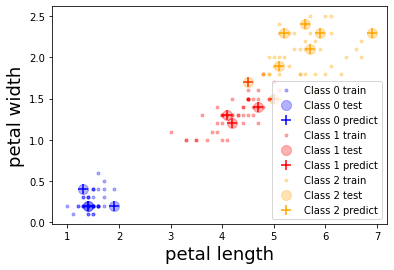

In [187]:
fig, ax = plt.subplots()
c3 = ['blue', 'red','orange']
for _y in np.unique(train4_y):
    # plot train data
    _Xtr = train4_x[train4_y==_y,:]
    ax.scatter(_Xtr[:,0], _Xtr[:,1], color=c3[_y], marker='.', alpha=0.3, label=f"Class {_y} train")
    # plot test data   
    _Xte = test4_x[test4_y==_y,:]
    ax.scatter(_Xte[:,0], _Xte[:,1], color=c3[_y], s=100, alpha=0.3, label=f"Class {_y} test")
    # plot predict data
    _Xpr = test4_x[predict4_y==_y,:]
    ax.scatter(_Xpr[:,0], _Xpr[:,1], color=c3[_y], marker='+', s=100, edgecolor='k', label=f"Class {_y} predict")


ax.set_xlabel("petal length", fontsize=18)
ax.set_ylabel("petal width", fontsize=18)
ax.legend(loc=4)

#### 4.2. Multivariate Normal Distribution
Here we will use probability to perform classification. We presume that each data come from one of several multivariate normal distributions, with known means and covariances. Thus, any given input/data can be assigned to the class from which it has the highest probability of arising.

First, we initialize and calculate the mean and covarience of each distribution using the following code.

In [188]:
# Initialize the data for normal distribution
mean3 = np.zeros((3, 2))
cov3 = np.zeros((3, 2, 2))
prec3 = np.zeros((3, 2, 2)) # inverse of convarience

# Calculate the data
for i in range(3):
    x3_i = train4_x[train4_y==i,:]
    mean3[i,:] = x3_i.mean(axis=0)
    cov3[i,:,:] = np.cov(x3_i.T, bias=True)
    prec3[i,:,:] = np.linalg.inv(cov3[i,:,:])

Next, we will can calculate and assign the class to the given test data by calculating its likelihood for each distribution and assign it to the one that gives the maximum likelihood. We can define the log likelihood function of normal distribution as shown in the code below.

Text(0.5, 1.0, 'Classification result using Multivariate Normal Distribution')

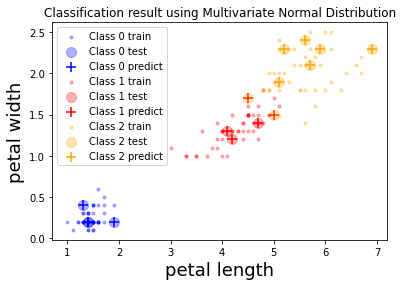

In [189]:
# Log_likelihood function
def log_likelihood(x, mean, prec):
    x0 = x - mean
    x2 = np.einsum('nk,kl,nl->n', x0, prec, x0)
    return -np.log(2 * np.pi) + np.linalg.slogdet(prec)[1] - 0.5 * x2 # calculate log likelihood of gaussian distribution
# Perform prediction
test_ll_x = np.array([log_likelihood(test4_x, mean3[k,:], prec3[k,:,:]) for k in range(3)])  # calculate likelihood for each gaussian
test_pred4_y = test_ll_x.argmax(axis=0) # assign the data to the distribution with maximum likelihood

# Plot the result
fig2, ax2 = plt.subplots()
for k in range(3):
    _Xtr = train4_x[train4_y==k,:]
    ax2.scatter(_Xtr[:,0], _Xtr[:,1], color=c3[k], marker='.', alpha=0.3, label=f"Class {k} train")
    _Xte = test4_x[test4_y==k,:]
    ax2.scatter(_Xte[:,0], _Xte[:,1], color=c3[k], s=100, alpha=0.3, label=f"Class {k} test")
    _Xpr = test4_x[test_pred4_y==k,:]
    ax2.scatter(_Xpr[:,0], _Xpr[:,1], color=c3[k], marker='+', s=100, edgecolor='k', label=f"Class {k} predict")

ax2.set_xlabel("petal length", fontsize=18)
ax2.set_ylabel("petal width", fontsize=18)
ax2.legend()
plt.title("Classification result using Multivariate Normal Distribution")

#### 4.3. Support Vector Machine
In this section, we will use support vector machine to separate data into two categories. We can use SVC from sklearn.svm to achieve this. First, we will extract data whose target is 0 or 1. As a result, we will attain data that can only be classified as 0 or 1. Now, we can try to split the data into two groups using the technique. 

In [190]:
from sklearn.svm import SVC
g43_y=iris_data.target[iris_data.target<2]
g43_x=iris_data.data[iris_data.target<2]
train43_x,test43_x,train43_y,test43_y = train_test_split(g43_x,g43_y,train_size=0.9)

Next, we will perform classification by inputting the train data to train the model as shown in the code below. Then, we proceed to predict the test data and plot the result.

Text(0.5, 1.0, 'Support Vector Machine result')

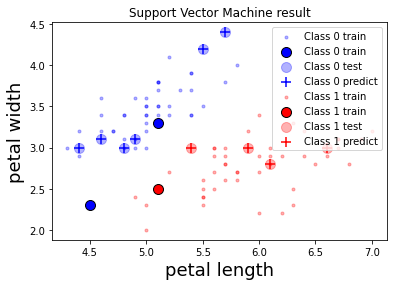

In [191]:
# perform classification using line to separate
lsvc = SVC(kernel='linear')
lsvc.fit(train43_x, train43_y)

# predict data
test_pred43_y = lsvc.predict(test43_x)

# support vector
train_sv43_x = train43_x[lsvc.support_]
train_sv43_y = train43_y[lsvc.support_]

# plot result
fig, ax = plt.subplots()
for k in range(2):
    _Xtr = train43_x[train43_y==k,:]
    ax.scatter(_Xtr[:,0], _Xtr[:,1], color=c3[k], marker='.', alpha=0.3, label=f"Class {k} train")
    _Xsv = train_sv43_x[train_sv43_y==k,:]
    ax.scatter(_Xsv[:,0], _Xsv[:,1], color=c3[k], s=100, edgecolor='k', label=f"Class {k} train")
    _Xte = test43_x[test43_y==k,:]
    ax.scatter(_Xte[:,0], _Xte[:,1], color=c3[k], s=100, alpha=0.3, label=f"Class {k} test")
    _Xpr = test43_x[test_pred43_y==k,:]
    ax.scatter(_Xpr[:,0], _Xpr[:,1], color=c3[k], marker='+', s=100, label=f"Class {k} predict")

ax.set_xlabel("petal length", fontsize=18)
ax.set_ylabel("petal width", fontsize=18)
ax.legend()
plt.title("Support Vector Machine result")
